# Common methods of Data Analisys (Python + R)
## Practical Statistics for Data Scientists
### Chapter 1. Exploratory Data Analysis

Import required Python packages.

In [3]:
%matplotlib inline
%load_ext rpy2.ipython

import rpy2

from pathlib import Path

import math
import numpy as np
import pandas as pd

import scipy.stats as st
from scipy import stats


from statsmodels import robust
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats
from statsmodels.stats import power
from statsmodels.stats import anova

import wquantiles
import sklearn

import seaborn as sns
import matplotlib.pylab as plt
from plotnine import ggplot, geom_line, geom_point, geom_smooth, aes, stat_smooth, facet_wrap

print("Imports Done!")

Imports Done!


Define paths to data sets. If you don't keep your data in the same directory as the code, adapt the path names.

In [44]:
DATA = "~/PycharmProjects/Datasets/"
mtcar_path = DATA + "mtcars.csv"
mtcar = pd.read_csv(mtcar_path)

In [ ]:
mtcar.head()

In [ ]:
mtcar.shape

In [ ]:
mtcar.describe()

In [ ]:
mtcar_df = mtcar.copy()

In [ ]:
mtcar_df = mtcar_df.rename(columns={"Unnamed: 0" : "Car Model"})

In [ ]:
mtcar_df["vs"] = mtcar_df["vs"].replace({0 : "V", 1 : "S"})

In [ ]:
mtcar_df["am"] = mtcar_df["am"].replace({0 : "Auto", 1 : "Manual"})

In [ ]:
result = mtcar_df["qsec"][(mtcar_df["cyl"] != 3) & (mtcar_df["mpg"] > 20)].mean()
result

In [ ]:
mtcar_df.groupby(["vs", "am"]).agg({"hp" : "mean"})

In [ ]:
mtcar_df.groupby("am").agg("median")

In [ ]:
mtcar_df.groupby("am").agg("median")

In [ ]:
mtcar_df.groupby(["am", "vs"]).agg("std").iloc[:,[0,2]]

In [ ]:
my_stats = mtcar_df.groupby(["am", "vs"]).agg("std").iloc[:,[0,2]]

In [ ]:
descriptions_stat = mtcar_df.groupby(["am"]).agg("std").loc[:, ["hp", "disp"]]
descriptions_stat

In [ ]:
round(mtcar_df.groupby(["am", "vs"]).agg({"qsec" : ["count", "min", "max", "mean", "std", "sem"]}), 2)

In [ ]:
mtcar_df.isna().sum()

Dealing with NA 

In [ ]:
# mtcar_df.head(15)

In [ ]:
# mtcar_df["mpg"].mean()

In [ ]:
# mtcar_df["mpg"].iloc[1:10] = None

In [ ]:
# mtcar_df.head(15)

In [ ]:
# mtcar_df["mpg"].mean()

In [ ]:
sns.histplot(mtcar_df["mpg"])

In [ ]:
ax = sns.boxplot(x="am", y="mpg", data=mtcar_df)

In [ ]:
sns.scatterplot(data=mtcar_df, x="mpg", y="hp", hue="vs", size= "qsec")

In [ ]:
sns.scatterplot(data=mtcar_df, x="mpg", y="disp", hue="hp")

In [ ]:
sns.displot(data=mtcar_df, x="mpg", hue="am", kde=True)

In [ ]:
mtcar_df.head()

In [ ]:
d = mtcar_df.groupby(["vs", "am"])["am"].count().unstack()
d

In [ ]:
p_value = st.fisher_exact(d)[1]
p_value

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html#scipy.stats.kendalltau

In [ ]:
st.pearsonr(mtcar_df["mpg"], mtcar_df["hp"])[0]

In [ ]:
# Расчёт степеней свободы для переменных и доверительного интервала для коэффициента корреляции Пирсона

def stdev(X):
    m = X.mean()
    return math.sqrt(sum((x-m)**2 for x in X) / len(X))

def degreesOfFreedom(X, Y):
    s1 = (stdev(X)**2)
    s2 = (stdev(Y)**2)
    df = (s1 / len(X) + s2 / len(Y))**2 / ((s1 / len(X))**2 / (len(X) - 1) + (s2 / len(Y))**2 / (len(Y) - 1))
    return(df)

def r_to_z(r):
    return math.log((1 + r) / (1 - r)) / 2.0

def z_to_r(z):
    e = math.exp(2 * z)
    return((e - 1) / (e + 1))

def r_confidence_interval(r, alpha, n):
    z = r_to_z(r)
    se = 1.0 / math.sqrt(n - 3)
    z_crit = stats.norm.ppf((1 + alpha)/2)  # 2-tailed z critical value

    lo = z - z_crit * se
    hi = z + z_crit * se

    # Return a sequence
    return (z_to_r(lo), z_to_r(hi))

https://stackoverflow.com/questions/33176049/how-do-you-compute-the-confidence-interval-for-pearsons-r-in-python

https://stackoverflow.com/questions/49473757/python-degrees-of-freedom

https://stepik.org/lesson/11508/step/2?unit=2531

In [ ]:
print('Degrees of freedom for Student-t distribution: ' + str(degreesOfFreedom(mtcar_df["mpg"], mtcar_df["hp"])))

In [ ]:
r_confidence_interval(st.pearsonr(mtcar_df["mpg"], mtcar_df["hp"])[0], .95, 31.479)

In [ ]:
sns.set_theme(style="darkgrid")
sns.relplot(x="mpg", y="hp", hue="cyl", palette="muted", height=6, data=mtcar_df)

In [ ]:
sns.set_theme(style="darkgrid")
sns.relplot(x="mpg", y="hp", hue="cyl", palette="muted", col="am", height=6, data=mtcar_df)

In [ ]:
sns.lmplot(x="mpg", y="hp", palette="muted", height=6, data=mtcar_df)

In [ ]:
sns.lmplot(x="mpg", y="hp", palette="muted", hue="vs", height=6, data=mtcar_df)

In [ ]:
mtcar_df.head()

In [ ]:
pd.plotting.scatter_matrix(mtcar_df[["mpg", "disp", "hp", "drat", "wt", "qsec"]], alpha=1, figsize=(20,15))

In [ ]:
model_lm = sm.OLS(mtcar_df["mpg"], pd.get_dummies(mtcar_df["cyl"]))
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

res = model_lm.fit()

print(res.params)
print(res.summary())

In [ ]:
mtcar_df.cyl.factorize()

In [ ]:
mtcar_df.cyl = mtcar_df.cyl.factorize()[0]
mtcar_df.head()

In [ ]:
model_lm = smf.ols("mpg ~ cyl", mtcar_df)

res = model_lm.fit()

print(res.params)
print(res.summary())

In [ ]:
model_mtcars = smf.ols("mpg ~ wt * am", mtcar_df)

res = model_mtcars.fit()

print(res.params)
print("---------------")
print(res.summary())
print("---------------")
print(res.conf_int())

In [ ]:
sns.lmplot(x="wt", y="mpg", hue="am", palette="muted", height=6, data=mtcar_df)

In [ ]:
(ggplot(mtcar_df, aes(x='wt', y='mpg', color="am"))
    + geom_point()
    + geom_smooth(method='lm'))

In [ ]:
(ggplot(mtcar_df, aes(x='wt', y='mpg', color="am"))
    + geom_smooth(method='lm'))

In [45]:
# https://stepik.org/lesson/10226/step/5?unit=2535
%%R -i mtcar

log_coef <- glm(am ~ disp + vs + mpg, mtcars, family = "binomial")$coefficients
log_coef

(Intercept)        disp          vs         mpg 
 1.89136001 -0.02525354 -5.45384569  0.28418829 


In [ ]:
# https://stepik.org/lesson/11508/step/5?unit=2531
# import pandas as pd
# import scipy.stats as st

# def corr_comp(data_frame: pd.DataFrame) -> tuple:
#     """Computing Pearson correlation coefficient and p-value for testing non-correlation.
#     """
#     return st.pearsonr(data_frame.iloc[:, 0], data_frame.iloc[:, 1])

# test_df = mtcar_df.iloc[:, [1,5]]
# corr_comp(test_df)

### NEW DATASET

In [ ]:
nucleotides = pd.read_csv("https://stepic.org/media/attachments/course/524/test_data.csv")
nucleotides.head()

In [ ]:
nucleotides.describe()

In [ ]:
v1_vc = nucleotides["V1"].value_counts()
v2_vc = nucleotides["V2"].value_counts()
v3_vc = nucleotides["V3"].value_counts()
[v1_vc, v2_vc, v3_vc]

In [ ]:
st.chisquare(v1_vc)

In [ ]:
# import pandas as pd
# import scipy.stats as st

# def smart_test(x: pd.DataFrame) -> list: 
#     """ Performing a Fisher exact test on input contingency table 
#         if at least one cell contains less than 5 observations. 
#         Else performing a one-way Chi-square test.
    
#     Parameters
#     ----------
#     x: pd.DataFrame
#         Input pd.DataFrame with some numeric data.
    
#     Returns
#     -------
#         Returns p-value if performing a Fisher exact test. 
#         If performing a one-way chi-square test returns:
#         chi-square test statistic, p-value of the test and degrees of freedom.
#     """

#     return st.fisher_exact(x)[1] if (x < 5).any().any() else [*st.chi2_contingency(x)[0:3]]

# # Примеры датафреймов для проведения тестов:
# df_1 = pd.DataFrame([[12, 7], [6, 7]])
# df_2 = pd.DataFrame([[8, 6], [2, 4]])

# # Пример запуска функции с тестовым датафреймом:
# smart_test(df_1)

In [ ]:
# pd.pivot_table(data=df_1, columns=df_1.columns)

In [ ]:
# Пытки-попытки!
# df_3 = pd.DataFrame([[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], 
#                      [0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1]]).T

# # df_3
# pd.pivot_table(data=df_3, values=df_3.columns)

In [ ]:
# # Примеры датафреймов для проведения тестов:
# df_1 = pd.DataFrame([[12, 7], [6, 7]])
# df_2 = pd.DataFrame([[8, 6], [2, 4]])

# # Пример запуска функции с тестовым датафреймом:
# smart_test(df_1)

In [ ]:
# help(smart_test)

In [ ]:
# Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import scipy.stats

# mtcar_path = PATH_TO_DATA + "mtcars.csv"
# mtcar = pd.read_csv(mtcar_path)
# d = mtcar.groupby(["vs", "am"])["am"].count().unstack()
# p_value = scipy.stats.fisher_exact(d)[1]

### NEW DATASET 

In [4]:
DATA = "~/PycharmProjects/Datasets/"
train_path = DATA + "train.csv"
train = pd.read_csv(train_path, sep=";")
train.head()

,gender,read,write,math,hon
0,male,57,52,41,N
1,male,44,33,54,N
2,male,63,44,47,N
3,male,47,52,57,N
4,male,50,59,42,N


In [5]:
%%R -i train
str(train)

'data.frame':	150 obs. of  5 variables:
 $ gender: chr  "male" "male" "male" "male" ...
 $ read  : int  57 44 63 47 50 63 57 60 57 73 ...
 $ write : int  52 33 44 52 59 57 55 46 65 60 ...
 $ math  : int  41 54 47 57 42 54 52 51 51 71 ...
 $ hon   : chr  "N" "N" "N" "N" ...


In [6]:
from plotnine.facets import facet_grid

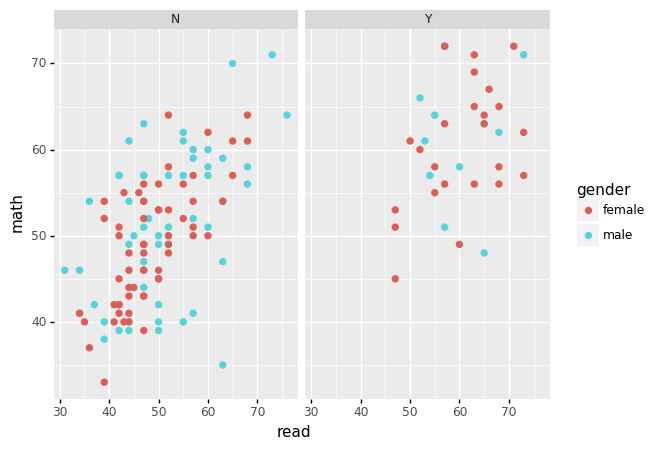

<ggplot: (8781182432284)>

In [7]:
(ggplot(train, aes(x = "read", y = "math", color = "gender")) + geom_point(size = 2) + facet_grid(". ~ hon"))

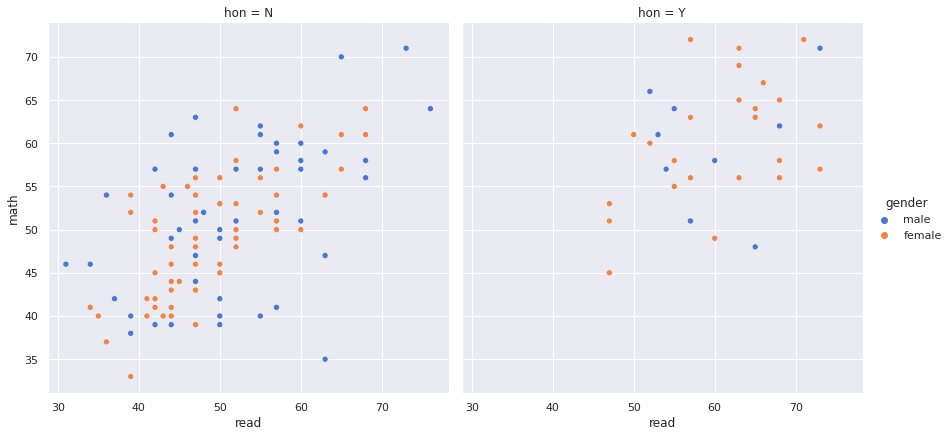

In [8]:
sns.set_theme(style="darkgrid")
sns.relplot(x="read", y="math", hue="gender", col="hon", palette="muted", height=6, data=train)

In [9]:
%%R 
my_df <- read.csv("https://stepik.org/media/attachments/lesson/10226/train.csv", sep=";")
fit <- glm(hon ~ read + math + gender, family = "binomial", data=my_df)
summary(fit)


Call:
glm(formula = hon ~ read + math + gender, family = "binomial", 
    data = my_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8173  -0.5989  -0.3086  -0.1087   2.3626  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -12.12407    2.14263  -5.659 1.53e-08 ***
read          0.06677    0.03291   2.029  0.04247 *  
math          0.13907    0.04243   3.277  0.00105 ** 
gendermale   -1.18606    0.51326  -2.311  0.02084 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 162.98  on 149  degrees of freedom
Residual deviance: 109.75  on 146  degrees of freedom
AIC: 117.75

Number of Fisher Scoring iterations: 5



In [10]:
glm_binom_train = smf.glm("hon ~ read + math + gender", data=train, family=sm.families.Binomial())
res_glm_binom_train = glm_binom_train.fit()
print(res_glm_binom_train.summary())

                  Generalized Linear Model Regression Results                   
Dep. Variable:     ['hon[N]', 'hon[Y]']   No. Observations:                  150
Model:                              GLM   Df Residuals:                      146
Model Family:                  Binomial   Df Model:                            3
Link Function:                    logit   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -54.874
Date:                   Чт, 12 ноя 2020   Deviance:                       109.75
Time:                          20:01:47   Pearson chi2:                     121.
No. Iterations:                       6                                         
Covariance Type:              nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         12.124

## Важное замечание! Модель glm из библиотеки statsmodels выше работает без преобразования типов. В отличие от примеров ниже.

- Для использования моделей логистической регрессии что в sklearn, что в statsmodels необходимо привести категориальные переменные в ранговые.

- Также, стоит отметить, что результаты работы моделей различны. 
https://stats.stackexchange.com/questions/203740/logistic-regression-scikit-learn-vs-statsmodels

- ### ВАЖНО! НЕ ПУСТАТЬ GLM и glm - разные модели!

In [ ]:
train["gender"] = pd.get_dummies(train["gender"])
train["hon"] = pd.get_dummies(train["hon"])
train.head()

In [ ]:
train_model = smf.logit("hon ~ read + math + gender", train)
res_train_model = train_model.fit()
print(res_train_model.summary())

In [ ]:
# train["hon"] = train["hon"].astype('category')
# train["gender"] = train["gender"].astype('category')
# X = train.loc[:, ["read", "math", "gender"]]
# y = train["hon"]

In [ ]:
from sklearn.linear_model import LogisticRegression

X = train.loc[:, ["read", "math", "gender"]]
y = train["hon"]
clf = LogisticRegression(penalty='l2').fit(X, y)

print(clf.intercept_)
print(clf.coef_)

In [35]:
%%R 

# exp(fit$coefficients)

# head(predict(object = fit))

head(predict(object = fit, type = "response"))

         1          2          3          4          5          6 
0.02183486 0.05404619 0.07128525 0.09579675 0.01582013 0.16887324 


In [42]:
train["probs"] = 1 - res_glm_binom_train.fittedvalues

In [43]:
train.head()

,gender,read,write,math,hon,probs
0,0,57,52,41,N,0.021835
1,0,44,33,54,N,0.054046
2,0,63,44,47,N,0.071285
3,0,47,52,57,N,0.095797
4,0,50,59,42,N,0.015820


In [54]:
%%R 

edu <- read.csv("https://stepik.org/media/attachments/lesson/11478/data.csv")
model <- 


    admit gre  gpa rank
1       0 380 3.61    3
2       1 660 3.67    3
3      NA 800 4.00    1
4      NA 640 3.19    4
5       0 520 2.93    4
6       1 760 3.00    2
7      NA 560 2.98    1
8      NA 400 3.08    2
9       1 540 3.39    3
10      0 700 3.92    2
11     NA 800 4.00    4
12     NA 440 3.22    1
13      1 760 4.00    1
14      0 700 3.08    2
15      1 700 4.00    1
16      0 480 3.44    3
17      0 780 3.87    4
18      0 360 2.56    3
19     NA 800 3.75    2
20     NA 540 3.81    1
21      0 500 3.17    3
22     NA 660 3.63    2
23     NA 600 2.82    4
24      0 680 3.19    4
25     NA 760 3.35    2
26      1 800 3.66    1
27      1 620 3.61    1
28      1 520 3.74    4
29      1 780 3.22    2
30      0 520 3.29    1
31      0 540 3.78    4
32      0 760 3.35    3
33      0 600 3.40    3
34      1 800 4.00    3
35     NA 360 3.14    1
36      0 400 3.05    2
37     NA 580 3.25    1
38      0 520 2.90    3
39      1 500 3.13    2
40      1 520 2.68    3
41     NA 560 2.

341     0 500 3.23    4
342    NA 560 2.65    3
343     0 500 3.95    4
344     0 580 3.06    2
345    NA 520 3.35    3
346     0 500 3.03    3
347    NA 600 3.35    2
348    NA 580 3.80    2
349    NA 400 3.36    2
350     0 620 2.85    2
351    NA 780 4.00    2
352     0 620 3.43    3
353     1 580 3.12    3
354     0 700 3.52    2
355    NA 540 3.78    2
356    NA 760 2.81    1
357     0 700 3.27    2
358    NA 720 3.31    1
359     1 560 3.69    3
360     0 720 3.94    3
361     1 520 4.00    1
362     1 540 3.49    1
363     0 680 3.14    2
364     0 460 3.44    2
365    NA 560 3.36    1
366     0 480 2.78    3
367     0 460 2.93    3
368    NA 620 3.63    3
369    NA 580 4.00    1
370     0 800 3.89    2
371     1 540 3.77    2
372     1 680 3.76    3
373     1 680 2.42    1
374     1 620 3.37    1
375     0 560 3.78    2
376     0 560 3.49    4
377     0 620 3.63    2
378     1 800 4.00    2
379    NA 640 3.12    3
380     0 540 2.70    2
381    NA 700 3.65    2
382     1 540 3.

### NEW DATASET 

In [ ]:
DATA = "~/PycharmProjects/Datasets/"
airquality_path = DATA + "airquality.csv"
airquality = pd.read_csv(airquality_path)

In [ ]:
airquality = airquality.drop("Unnamed: 0", axis=1)

In [ ]:
airquality.head(10)

In [ ]:
airquality_df = airquality.copy()

In [ ]:
airquality_df.loc[airquality_df.Month >= 7]
# ИЛИ
airquality_df.query("Month >= 7")

In [ ]:
aq_ss = airquality_df.query("Month >= 7")

In [ ]:
aq_ss.groupby("Month").agg({"Ozone" : "count"})
# ИЛИ 
# airquality_df.query("Month >= 7").groupby("Month").agg({"Ozone" : "count"})

In [ ]:
sns.boxplot(x="Month", y="Ozone", data=airquality_df)

### NEW DATASET

In [ ]:
DATA = "~/PycharmProjects/Datasets/"
iris_path = DATA + "iris.csv"
iris = pd.read_csv(iris_path, index_col=0)

In [ ]:
iris.head(10)

In [ ]:
iris.describe()

In [ ]:
iris.agg("std")

In [ ]:
iris[iris.Species == "virginica"].median().sort_values(ascending=False)

In [ ]:
sns.displot(data=iris, x="Sepal.Length", hue="Species", multiple="stack")

In [ ]:
iris_df = iris[iris.Species != "setosa"]

In [ ]:
sns.histplot(iris_df, x="Sepal.Length", kde=True, hue="Species")

In [ ]:
g = sns.FacetGrid(iris_df, col="Species")
g.map(sns.histplot, "Sepal.Length", kde=True, bins=5)
g.add_legend()

https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid - IMBA

In [ ]:
sns.histplot(iris_df, x="Sepal.Length", hue="Species", element="poly") 

In [ ]:
sns.displot(iris_df, x="Sepal.Length", hue="Species", kind="kde")

In [ ]:
sns.kdeplot(data=iris_df, x="Sepal.Length", hue="Species", fill=True, common_norm=False, alpha=.5, linewidth=1)

In [ ]:
sns.set_theme(style="darkgrid")
sns.boxplot(y="Sepal.Length", x="Species", data=iris_df)

In [ ]:
# Perform the Shapiro-Wilk test for normality.
shapiro_test = stats.shapiro(iris_df["Sepal.Length"])
shapiro_test

In [ ]:
shapiro_test_1 = stats.shapiro(iris_df[iris_df.Species == "versicolor"]["Sepal.Length"])
shapiro_test_2 = stats.shapiro(iris_df[iris_df.Species == "virginica"]["Sepal.Length"])
[shapiro_test_1, shapiro_test_2]

In [ ]:
# Perform Bartlett’s test for equal variances.
# Гомогенность дисперсии проверяем, короче.
stat, p = st.bartlett(iris_df[iris_df.Species == "virginica"]["Sepal.Length"], 
                               iris_df[iris_df.Species == "versicolor"]["Sepal.Length"])
print("The test statistic is {}. \nThe p-value of the test is {}.".format(stat, p))

In [ ]:
# Calculate the T-test for the means of two independent samples of scores.
t_test = st.ttest_ind(iris_df[iris_df.Species == "virginica"]["Sepal.Length"], 
                               iris_df[iris_df.Species == "versicolor"]["Sepal.Length"]) #, equal_var=True
t_test

In [ ]:
# Проверяем гипотезу о том, что среднее значение длины чашелистика в генеральной совокупности (датасете) равно 8.
# Для этого используем одновыборочный Т-тест. 
t_test = st.ttest_1samp(iris_df["Sepal.Length"], 8) 
t_test

Как и следовало ожидать - нет, среднее значение "Sepal.Length" не равно 8.

In [ ]:
import numpy as np
import scipy.stats

# Самописная фукнция с просторов интернета, которая вычисляет доверительный интервал. Полезно!
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [ ]:
mean_confidence_interval(iris_df["Sepal.Length"])

In [ ]:
# Расчёт доверительных интервалов
import numpy as np, scipy.stats as st

a = iris_df[iris_df.Species == "versicolor"]["Sepal.Length"]
b = iris_df[iris_df.Species == "virginica"]["Sepal.Length"]

print(st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)),
      st.t.interval(0.95, len(b)-1, loc=np.mean(b), scale=st.sem(b)))
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html?highlight=scipy%20stats%20t#scipy.stats.t

In [ ]:
print(mean_confidence_interval(a),
      mean_confidence_interval(b))

Вывод - самописная функция повторяет метод .interval из библиотеки scipy.

Отлично!

In [ ]:
print(a.quantile([0.05, 0.95]), "\n\n",
      b.quantile([0.05, 0.95]))
print("\n\n")
print(iris_df["Sepal.Length"].quantile([0.05, 0.95]))

Итого - метод квантиль какой-то странный. Что-то тут не так, очевидно. Лучше его не использовать. 

Надо бы разобраться, почему такая разница.

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))

stats.probplot(iris_df["Sepal.Length"], plot=ax)

plt.tight_layout()
plt.show()

In [ ]:
# Парный Т-тест
pt_test = scipy.stats.ttest_rel(iris_df["Sepal.Length"], iris_df["Sepal.Width"])
pt_test

Для визуализации "планок погрешностей" можно использовать:

- matplotlib, а именно matplotlib.pyplot.errorbar: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html

- seaborn.pointplot: https://seaborn.pydata.org/generated/seaborn.pointplot.html

In [ ]:
iris_df.Species.unique()

In [ ]:
a = iris_df[iris_df.Species == "versicolor"]["Sepal.Length"].mean()
a

In [ ]:
# Хехе, получилось!
a_origin = iris_df[iris_df.Species == "versicolor"]["Sepal.Length"]
a = iris_df[iris_df.Species == "versicolor"]["Sepal.Length"].mean()
b_origin = iris_df[iris_df.Species == "virginica"]["Sepal.Length"]
b = iris_df[iris_df.Species == "virginica"]["Sepal.Length"].mean()

plt.errorbar(x=iris_df.Species.unique(), y=[a, b], 
             yerr=[a-st.t.interval(0.95, len(a_origin)-1, loc=np.mean(a_origin), scale=st.sem(a_origin)), 
                  b-st.t.interval(0.95, len(b_origin)-1, loc=np.mean(b_origin), scale=st.sem(b_origin))],
             data=iris_df, fmt="o", markersize=8, capsize=10) # fmt="-o", "--o", ".k"

In [ ]:
sns.set_theme(style="darkgrid")
ax = sns.pointplot(x="Species", y="Sepal.Length", data=iris_df, join=False, capsize=.1)

In [ ]:
# Непараметрический тест на нормальность (Манна-Уитни), в англоязычной литературе - Уилкоксона
wtest = scipy.stats.wilcoxon(iris_df[iris_df.Species == "virginica"]["Sepal.Length"], 
                            iris_df[iris_df.Species == "versicolor"]["Sepal.Length"])
print(wtest)
mw_test = scipy.stats.mannwhitneyu(iris_df[iris_df.Species == "virginica"]["Sepal.Length"], 
                                   iris_df[iris_df.Species == "versicolor"]["Sepal.Length"])
print(mw_test)
# Получается, что реализации этих тестов различаются в R и Python. Подробности по ссылке:
# https://stackoverflow.com/questions/33579785/difference-between-wilcoxon-test-in-r-and-python
# Вывод - Можно использовать и Python, но если p-value различаются, то лучше полагаться на R.
# Однако, немаловажно отметить, что тест Бартлетта и Т-тест совпадают. 

In [ ]:
model_iris = smf.ols('iris["Sepal.Width"] ~ Species', data=iris).fit()
model_iris.summary() if str(input()) == "1" else print(model_iris.summary())

In [ ]:
aov_table_iris = sm.stats.anova_lm(model_iris)
aov_table_iris

In [ ]:
tukey_test_result_iris = sm.stats.multicomp.pairwise_tukeyhsd(endog=iris["Sepal.Width"], groups=iris["Species"])
print(tukey_test_result_iris)

In [ ]:
# https://stepik.org/lesson/11508/step/15?unit=2531
sns.lmplot(x="Sepal.Width", y="Petal.Width", hue="Species", data=iris)

In [ ]:
# import seaborn as sns
# import statsmodels.api as sm

# iris = sns.load_dataset("iris")
# tukey_test_result_iris = sm.stats.multicomp.pairwise_tukeyhsd(endog=iris.sepal_width, groups=iris.species)
# print(tukey_test_result_iris)

In [ ]:
# DATA =  "~/Downloads/"
# path = DATA + "dataset_11504_15 (1).txt"
# df = pd.read_csv(path, sep=" ", header=None)
# df.columns = ["V1", "V2"]
# df.head()

In [ ]:
# stat, p = scipy.stats.bartlett(df[df.V2 == 1]["V1"], 
#                                df[df.V2 == 2]["V1"])
# print("The test statistic is {}. \nThe p-value of the test is {}.".format(stat, p))

In [ ]:
# wtest = scipy.stats.wilcoxon(df[df.V2 == 1]["V1"], 
#                              df[df.V2 == 2]["V1"], mode='approx')
# wtest

In [ ]:
# scipy.stats.wilcoxon(df[df.V2 == 1]["V1"], df[df.V2 == 2]["V1"])[1]

In [ ]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import scipy.stats

# DATA =  "~/Downloads/"
# path = DATA + "dataset_11504_15.txt"
# df = pd.read_csv(path, sep=" ", header=None)
# df.columns = ["V1", "V2"]
# print(scipy.stats.wilcoxon(df[df.V2 == 1]["V1"], df[df.V2 == 2]["V1"])[1]) if (scipy.stats.bartlett(df[df.V2 == 1]["V1"], df[df.V2 == 2]["V1"])[1] < 0.05) else print(scipy.stats.ttest_ind(df[df.V2 == 1]["V1"], df[df.V2 == 2]["V1"])[1])

In [ ]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import scipy.stats

# DATA =  "~/Downloads/"
# path = DATA + "dataset_11504_16.txt"
# df = pd.read_csv(path, sep=" ", header=None)
# df.columns = ["V1", "V2"]
# print("{} {} {}".format(df.V1.mean(),df.V2.mean(),scipy.stats.ttest_ind(df.V1, df.V2)[1])) if (scipy.stats.ttest_ind(df.V1, df.V2)[1] < 0.05) else print("The difference is not significant")

### NEW DATASET

In [ ]:
DATA = "~/PycharmProjects/Datasets/"
swiss_path = DATA + "swiss.csv"
swiss = pd.read_csv(swiss_path, index_col=0)
swiss.head()

In [ ]:
model_swiss = smf.ols("Fertility ~ Examination + Catholic", swiss)

res = model_swiss.fit()

print(res.params)
print(res.summary())

In [ ]:
model_swiss_2 = smf.ols("Fertility ~ Examination * Catholic", swiss)

res_2 = model_swiss_2.fit()

print(res_2.params)
print(res_2.summary())

In [ ]:
# Доверительные интервалы для оценки коэффициентов: 0 - 2.5%; 1 - 97.5%
res_2.conf_int()

Только в Examination в доверительный интервал не входит 0 - это означает, что этот параметр надёжно предсказывает результат.

In [ ]:
swiss_df = swiss.copy()

In [ ]:
swiss_df["religious"] = np.where(swiss_df["Catholic"] > 60, "Lots", "Few")

In [ ]:
swiss_df.head()

In [ ]:
model_swiss_3 = smf.ols("Fertility ~ Examination + religious", swiss_df)

res_3 = model_swiss_3.fit()

print(res_3.params)
print("---------------")
print(res_3.summary())
print("---------------")
print(res_3.conf_int())

In [ ]:
model_swiss_4 = smf.ols("Fertility ~ Examination * religious", swiss_df)

res_4 = model_swiss_4.fit()

print(res_4.params)
print("---------------")
print(res_4.summary())
print("---------------")
print(res_4.conf_int())
# Все интервалы, которые не пересекают 0 - имеют статистическую значимость. И чем дальше от 0
# не важно в какую сторону, тем сильнее. Значение P>|t| до 0.1 представляет собой статистическую тенденцию.
# Хоть важность и не велика, но это знак, что нужно обратить внимание на эту переменную.

In [ ]:
sns.lmplot(x="Examination", y="Fertility", data=swiss_df)

In [ ]:
sns.regplot(x="Examination", y="Fertility", data=swiss_df, order=5, ci=None)

In [ ]:
from plotnine import ggplot, geom_point, geom_smooth, aes, stat_smooth, facet_wrap

ggplot(swiss_df, aes(x = "Examination", y = "Fertility")) + geom_point() 

In [ ]:
ggplot(swiss_df, aes(x = "Examination", y = "Fertility")) + geom_point() + geom_smooth(span=.4)

In [ ]:
sns.set_theme(style="darkgrid")
sns.relplot(x="Examination", y="Fertility", hue="religious", palette="muted", height=6, data=swiss_df)

In [ ]:
ggplot(swiss_df, aes(x = "Examination", y = "Fertility", color = "religious")) + geom_point() 

In [ ]:
ggplot(swiss_df, aes(x = "Examination", y = "Fertility", color = "religious")) + geom_point() + geom_smooth(span=.6)

In [ ]:
ggplot(swiss_df, aes(x = "Examination", y = "Fertility", color = "religious")) + \
geom_point() + geom_smooth(span=.6, method='lm')

In [ ]:
sns.lmplot(x="Examination", y="Fertility", hue="religious", palette="muted", height=6, data=swiss_df)

In [ ]:
swiss_df = swiss_df.rename(columns={"Infant.Mortality" : "Infant_Mortality"})
swiss_df.head()

In [ ]:
model_swiss_5 = smf.ols("Fertility ~ Examination * religious * Infant_Mortality", swiss_df)

res_5 = model_swiss_5.fit()

print(res_5.params)
print("---------------")
print(res_5.summary())
print("---------------")
print(res_5.conf_int())

In [ ]:
DATA = "~/PycharmProjects/Datasets/"
swiss_path = DATA + "swiss.csv"
swiss = pd.read_csv(swiss_path, index_col=0)
swiss = swiss.rename(columns={"Infant.Mortality" : "Infant_Mortality"})
swiss.head()

In [ ]:
model_swiss_full = smf.ols("Fertility ~ Infant_Mortality + Education + Catholic + Agriculture + Examination", swiss)
res_full = model_swiss_full.fit()
print(res_full.summary())
print("\n------------------------------------\n")
model_swiss_reduced = smf.ols("Fertility ~ Infant_Mortality + Education + Catholic + Examination", swiss)
res_reduced = model_swiss_reduced.fit()
print(res_reduced.summary())

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

table = sm.stats.anova_lm(res_reduced, res_full) 
table
# РАБОТАЕТ!

Результаты таблицы показывают, что так как F-значение высокое, то доля дисперсии, объясняемая полной моделью значимо больше, чем объясняемая неполной. Значит - полная лучше.

In [ ]:
table = sm.stats.anova_lm(res_full, res_reduced) 
table
# Неудачный вариант, см. комментарий ниже.

### Важно отметить, что в Python+statsmodels в ANOVA важен порядок передачи моделей. В R - без разницы. А тут результат может и не посчитаться.

In [ ]:
model_swiss_reduced_2 = smf.ols("Fertility ~ Infant_Mortality + Education + Catholic + Agriculture", swiss)
res_reduced_2 = model_swiss_reduced_2.fit()
print(res_reduced_2.summary())

In [ ]:
table = sm.stats.anova_lm(res_reduced_2, res_full) 
table
# Р-уровень значимости высокий - значит полная модель не лучше, чем урезанная.

P-уровень значимости высокий - значит полная модель не лучше, чем урезанная и они примерно одинаково объясняют дисперсию в результатах.

In [ ]:
pd.plotting.scatter_matrix(swiss, alpha=1, figsize=(20,15))

In [ ]:
sns.scatterplot(x = "Examination", y = "Education", data = swiss)

In [ ]:
sns.lmplot(x = "Examination", y = "Education", data = swiss)

In [ ]:
swiss["Examination"].hist(bins=30)

In [ ]:
swiss["Education"].hist(bins=30)

In [ ]:
np.log(swiss["Education"]).hist(bins=30)

In [ ]:
ggplot(swiss_df, aes(x = "Examination", y = "Education")) + geom_point() + geom_smooth(span=.4)

In [ ]:
model_swiss = smf.ols("Education ~ Examination", swiss)
res_model_swiss = model_swiss.fit()
print(res_model_swiss.summary())

In [ ]:
swiss["Examination_squared"] = swiss["Examination"] ** 2
swiss.head()

In [ ]:
model_swiss_2 = smf.ols("Education ~ Examination + Examination_squared", swiss)
res_model_swiss_2 = model_swiss_2.fit()
print(res_model_swiss_2.summary())

In [ ]:
table_swiss_anova = sm.stats.anova_lm(res_model_swiss, res_model_swiss_2) 
table_swiss_anova
# Индекс 0 - первая модель; 1 - вторая

In [ ]:
swiss["fv_model_1"] = res_model_swiss.fittedvalues
swiss["resid_model_1"] = res_model_swiss.resid

swiss["fv_model_2"] = res_model_swiss_2.fittedvalues
swiss["resid_model_2"] = res_model_swiss_2.resid
swiss["obs_number"] = [i for i in range(1, len(swiss.index)+1)]

swiss.head()

In [ ]:
(ggplot(swiss, aes(x = "Examination", y = "Education")) + geom_point(size = 1) + \
 geom_line(aes(x = "Examination", y = "fv_model_1"), color = 'red'))

In [ ]:
sns.lmplot(x = "Examination", y = "Education", data = swiss).fig.set_size_inches(10,10)

Как строить нелинейную регрессионную прямую.

https://stackoverflow.com/questions/52471649/sklearn-polynomial-regression

https://stackoverflow.com/questions/46497892/non-linear-regression-in-seaborn-python

https://scipy-cookbook.readthedocs.io/items/robust_regression.html

In [ ]:
# Пример построения нескольких регрессионных прямых на графике
# https://stackoverflow.com/questions/36026149/plotting-multiple-linear-regressions-on-the-same-seaborn-plot

# x1 = np.random.randn(50)
# y1 = np.random.randn(50) * 100
# x2 = np.random.randn(50)
# y2 = np.random.randn(50) * 100

# df1 = pd.DataFrame({'x1':x1, 'y1': y1})
# df2 = pd.DataFrame({'x2':x2, 'y2': y2})

# df = pd.concat([df1.rename(columns={'x1':'x','y1':'y'})
#                 .join(pd.Series(['df1']*len(df1), name='df')), 
#                 df2.rename(columns={'x2':'x','y2':'y'})
#                 .join(pd.Series(['df2']*len(df2), name='df'))],
#                ignore_index=True)

# pal = dict(df1="red", df2="blue")
# g = sns.FacetGrid(df, hue='df', palette=pal, height=5);
# g.map(plt.scatter, "x", "y", s=50, alpha=.7, linewidth=.5, edgecolor="white")
# g.map(sns.regplot, "x", "y", ci=None, robust=1)
# g.add_legend();

In [ ]:
# g = sns.FacetGrid(swiss, height=5);
# g.map(plt.scatter, "Examination", "Education", s=50, alpha=.7, linewidth=.5, edgecolor="white")
# g.map(sns.regplot, "Examination", "fv_model_1", ci=None, robust=1)
# g.add_legend();

In [ ]:
# https://stackoverflow.com/questions/52471649/sklearn-polynomial-regression
z = np.polyfit(swiss["Examination"], swiss["Education"], 3)
p = np.poly1d(z)
xp = np.linspace(swiss["Examination"].min(), swiss["Education"].max(), 100)
plt.plot(swiss["Examination"], swiss["Education"], '.', xp, p(xp), '-')
plt.plot(swiss["Examination"], swiss["fv_model_1"])

In [ ]:
(ggplot(swiss, aes(x = "Examination", y = "Education")) + geom_point(size = 1) + \
geom_line(aes(x = "Examination", y = "fv_model_1"), color = 'red') + \
geom_line(aes(x = "Examination", y = "fv_model_2"), color = 'blue'))

In [ ]:
# График остатков! Пригодился!
sns.residplot(x="fv_model_1", y="resid_model_1", data=swiss)

In [ ]:
sns.residplot(x="fv_model_2", y="resid_model_2", data=swiss)

In [ ]:
swiss.head()

In [ ]:
(ggplot(swiss, aes(x = "obs_number", y = "resid_model_1")) + geom_point(size = 2) + geom_smooth(span=.40))

In [ ]:
(ggplot(swiss, aes(x = "obs_number", y = "resid_model_2")) + geom_point(size = 2) + geom_smooth(span=.40))

In [ ]:
sns.histplot(data=swiss, x="resid_model_1", multiple="dodge", shrink=.8)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

stats.probplot(swiss["resid_model_1"], plot=ax)

plt.tight_layout()
plt.show()

In [ ]:
# Perform the Shapiro-Wilk test for normality.
shapiro_test = stats.shapiro(swiss["resid_model_1"])
shapiro_test
# Остатки распределены не нормально! Хотя это и так было понятно по графику.

In [ ]:
sns.histplot(data=swiss, x="resid_model_2", multiple="dodge", shrink=.8)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

stats.probplot(swiss["resid_model_2"], plot=ax)

plt.tight_layout()
plt.show()

In [ ]:
# Perform the Shapiro-Wilk test for normality.
shapiro_test = stats.shapiro(swiss["resid_model_2"])
shapiro_test
# Остатки распределены не нормально! Хотя это и так было понятно по графику.

In [ ]:
%%R

test_data <- as.data.frame(list(V1 = c(0.8, 1.3, -0.2, -0.9, 1.9), 
                                V2 = c(0.8, 0.1, 0.8, 0.8, 0), 
                                V3 = c(0.1, 0.6, -0.7, -0.9, -0.2), 
                                V4 = c(1.3, 0.3, 1.3, -1, 0.5), 
                                V5 = c(0.9, 0.4, -0.1, -1.2, 0.1), 
                                V6 = c(-1.9, 1.3, 0.8, -1, 0.2), 
                                V7 = c(0.7, 1.1, -1.1, 1.6, 0.2), 
                                V8 = c(1.3, 1.4, -0.4, 0.6, -0.2), 
                                V9 = c(2.3, -0.7, 0, -0.2, -1.3), 
                                V10 = c(1, 2.6, 1.1, -1.7, 1.3), 
                                V11 = c(-0.1, -0.6, 0.7, 0.9, 0.2)))


high.corr <- function(x){
  corr_matrix <- cor(x[sapply(x, is.numeric)])
  diag(corr_matrix) <- 0
  rownames(which(corr_matrix == max(abs(corr_matrix)), arr.ind = TRUE))}

high.corr(swiss)
high.corr(test_data)


## Homoscedasticity testing

In [ ]:
homosc_test = pd.read_csv("https://stepic.org/media/attachments/lesson/12088/homosc.csv")
homosc_test.head()

In [ ]:
model_homosc_test = smf.ols("DV ~ IV", homosc_test)
res_homosc_test = model_homosc_test.fit()
print(res_homosc_test.summary())

In [ ]:
sns.residplot(x=res_homosc_test.fittedvalues, y=res_homosc_test.resid, data=homosc_test)

https://en.wikipedia.org/wiki/Heteroscedasticity#Detection

https://stackoverflow.com/questions/35322462/finding-heteroscedasticity-in-time-series

--------
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html?highlight=levene#scipy.stats.levene


https://towardsdatascience.com/verifying-the-assumptions-of-linear-regression-in-python-and-r-f4cd2907d4c0

In [ ]:
bp_test = pd.DataFrame(statsmodels.stats.diagnostic.het_breuschpagan(res_homosc_test.resid, model_homosc_test.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

gq_test = pd.DataFrame(statsmodels.stats.diagnostic.het_goldfeldquandt(res_homosc_test.resid, model_homosc_test.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

In [ ]:
# p-value больше 0,05 - следовательно, дисперсия остатков в одной подвыбоборке выше, чем в другой.
# Значит, условие гомоскедастичности нарушается и дисперсия модели непостоянна.
# Можно наблюдать на графиках выше, как она увеличивается, т. е. точки на графике расходятся "конусом" от нуля.
print(bp_test)
print("-------------------")
print(gq_test)

## NEW DATASET

In [ ]:
DATA = "~/PycharmProjects/Datasets/"
attitude_path = DATA + "attitude.csv"
attitude = pd.read_csv(attitude_path, index_col=0)
attitude.head()

In [ ]:
attitude_model_full = smf.ols("rating ~ complaints + privileges + learning + raises + critical + advance", attitude)
res_attitude_model_full = attitude_model_full.fit()
print(res_attitude_model_full.summary())

In [ ]:
attitude_model_null = smf.ols("rating ~ 1", attitude)
res_attitude_model_null = attitude_model_null.fit()
print(res_attitude_model_null.summary())

https://stackoverflow.com/questions/22428625/does-statsmodels-or-another-python-package-offer-an-equivalent-to-rs-step-f

https://stackoverflow.com/questions/49493468/python-equivalent-for-r-stepaic-for-logistic-regression-direction-backwards

https://www.reddit.com/r/pystats/comments/68pikh/python_equivalent_for_r_stepwise_regression/

In [ ]:
# print(attitude.columns)
# print(len(attitude.columns))

In [ ]:
# Код с просторов stackoverflow для рассчёта 
import itertools
import statsmodels.api as sm

# Не работает правильно - надо разобраться почему.
# AICs = {}
# for k in range(1,len(swiss.columns)+1):
#     for variables in itertools.combinations(attitude.columns, k):
#         predictors = attitude.loc[:, list(variables)]
#         predictors['Intercept'] = 1
#         res = sm.OLS(attitude['rating'], predictors).fit()
#         AICs[variables] = 2*(k+1) - 2*res.llf
# print(pd.Series(AICs).idxmin())
# print(pd.Series(AICs))
# {k: v for k, v in sorted(AICs.items(), key=lambda item: item[1])}

# -------------------------------------------------------------------

# AICs = {}
# for k in range(1,len(attitude.columns)+1):
#     for variables in itertools.combinations(attitude.columns, k):
#         predictors = list(variables)
#         i = True
#         independent =''
#         for p in predictors:
#             if i:
#                 independent = p
#                 i = False
#             else:
#                 independent+='+ {}'.format(p)
#         regresion = 'rating ~ {}'.format(independent)
#         res = smf.ols(regresion, data=attitude).fit()
#         AICs[variables] = 2*(k+1) - 2*res.llf
# pd.Series(AICs).idxmin()


# Не работает правильно - надо разобраться почему.


# ТЕСТ ФУНКЦИИ
AICs = {}
for k in range(1,len(swiss.columns)+1):
    for variables in itertools.combinations(attitude.columns, k):
        predictors = attitude.loc[:, list(variables)]
        predictors['Intercept'] = 1
        res = sm.OLS(attitude['rating'], predictors).fit()
        AICs[variables] = res.aic

# print(AICs)
print({k: v for k, v in sorted(AICs.items(), key=lambda item: -item[1])})

# Вроде работает! Правда, не совсем правильно. 


In [ ]:
# sns.residplot(x="Examination", y="Fertility", data=swiss_df)
# График остатков. На будущее. 

In [ ]:
# import ggplot

# ggplot(swiss, aes(x = Examination, y = Fertility)) + \
#   geom_point() + geom_smooth()

### NEW DATASET

In [50]:
DATA = "~/PycharmProjects/Datasets/"
tooth_path = DATA + "ToothGrowth.csv"
toothgrowth = pd.read_csv(tooth_path, index_col=0)

In [ ]:
toothgrowth.head(10)

In [ ]:
toothgrowth.shape

In [ ]:
toothgrowth.describe()

In [ ]:
subset_oj = toothgrowth[(toothgrowth.supp == "OJ") & (toothgrowth.dose == 0.5)]
subset_vc = toothgrowth[(toothgrowth.supp == "VC") & (toothgrowth.dose == 2.0)]

In [ ]:
t_test = st.ttest_ind(subset_oj.len, subset_vc.len) 
t_test.statistic

In [ ]:
sns.set_theme(style="darkgrid")
ax = sns.pointplot(x="dose", y="len", hue="supp", data=toothgrowth, join=True, capsize=.1, dodge=True)

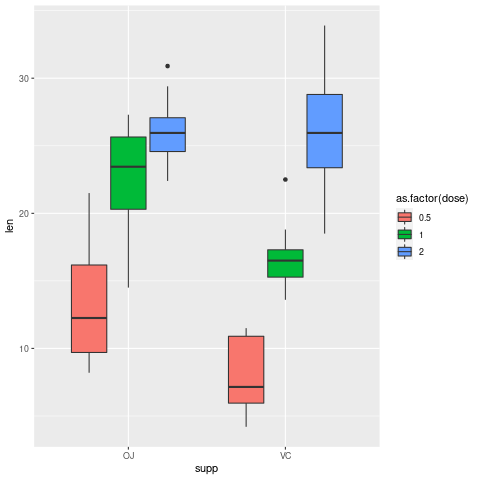

In [52]:
%%R -i toothgrowth

library("ggplot2")

ggplot(data = ToothGrowth, aes(x = supp, y = len, fill = as.factor(dose))) + geom_boxplot()

In [ ]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import scipy.stats

# tooth_path = PATH_TO_DATA + "ToothGrowth.csv"
# toothgrowth = pd.read_csv(tooth_path, index_col=0)
# t_test = scipy.stats.ttest_ind(toothgrowth[(toothgrowth.supp == "OJ") & (toothgrowth.dose == 0.5)].len, 
#                                toothgrowth[(toothgrowth.supp == "VC") & (toothgrowth.dose == 2.0)].len) 
# print(t_test.statistic)

In [ ]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import seaborn as sns
# tooth_path = PATH_TO_DATA + "ToothGrowth.csv"
# toothgrowth = pd.read_csv(tooth_path, index_col=0)
# sns.set_theme(style="darkgrid")
# ax = sns.pointplot(x="dose", y="len", hue="supp", data=toothgrowth, join=True, capsize=.1, dodge=True)

### NEW DATASET

In [ ]:
DATA = "~/PycharmProjects/Datasets/"
lec_path = DATA + "lekarstva.csv"
lekarstva = pd.read_csv(lec_path, index_col=0)

In [ ]:
print(lekarstva.shape)
lekarstva.head()

In [ ]:
lekarstva.describe()

In [ ]:
lec_pair_t_test = scipy.stats.ttest_rel(lekarstva.Pressure_after, lekarstva.Pressure_before) 
lec_pair_t_test.statistic

In [ ]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import scipy.stats

# lec_path = PATH_TO_DATA + "lekarstva.csv"
# lekarstva = pd.read_csv(lec_path, index_col=0)
# lec_pair_t_test = scipy.stats.ttest_rel(lekarstva.Pressure_before, lekarstva.Pressure_after) 
# print(lec_pair_t_test.statistic)

## NEW CHAPTER AND NEW DATASET

In [ ]:
DATA = "~/PycharmProjects/Datasets/"
grants_path = DATA + "grants.csv"
grants = pd.read_csv(grants_path)

In [ ]:
grants.head()

In [ ]:
grants.shape

In [ ]:
grants.isna().sum()

In [ ]:
grants.describe()

In [ ]:
grants_df = grants.copy()

In [ ]:
grants_df["status"] = grants_df["status"].replace({0 : "Not funded", 1 : "Funded"})

In [ ]:
grants_df["status"].unique()

In [ ]:
grants_df.head(3)

In [ ]:
table_1 = pd.pivot_table(grants_df, index="status", values="field", aggfunc="count")
table_1

In [ ]:
table_2 = pd.pivot_table(grants_df, index=["field"], columns=["status"], aggfunc="count")
table_2

In [ ]:
# Неудачные попытки
# -----------------------------
# grants_df.groupby(["field", "status"]).agg({"status" : "count"}).unstack()
# -----------------------------
# table_2 = grants_df.pivot_table(index="status", columns=["field"], aggfunc="count")
# table_2

In [ ]:
dist = grants_df.groupby(["field", "status"])["status"].count().unstack()
dist

In [ ]:
# Binom test
p_value_1 = scipy.stats.binom_test(table_1)
p_value_1

In [ ]:
# ChiSquare test
cs_res_1 = scipy.stats.chisquare(table_1)
print(cs_res_1)
print("The chi-squared test statistic is {}; \nThe p-value of the test is {}.".format(cs_res_1[0], cs_res_1[1]))

In [ ]:
cs_res_2 = scipy.stats.chisquare(dist.T)
cs_res_2

### New Dataset

In [ ]:
DATA = "~/PycharmProjects/Datasets/"
hec_path = DATA + "HairEyeColor.csv"
hec = pd.read_csv(hec_path)

In [ ]:
hec = hec.drop("Unnamed: 0", axis=1)

In [ ]:
hec.head()

In [ ]:
hec_fem = hec[hec.Sex == "Female"]
hec_fem

In [ ]:
# Неудачные попытки
# sns.histplot(data=hec_fem, x="Hair", y="Freq")

In [ ]:
sns.catplot(data=hec_fem, x="Hair", y="Freq", hue="Eye", kind="bar")

In [ ]:
# Как сделать хорошо и правильно? - Посмотри туториалы.
# titanic = sns.load_dataset("titanic")
# sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)

In [ ]:
hec_fem[hec_fem.Hair == "Brown"].iloc[:,[1, 3]]

In [ ]:
brown_haired_ladies = hec_fem[hec_fem.Hair == "Brown"].iloc[:,[1, 3]].set_index("Eye")
brown_haired_ladies

In [ ]:
cs_res_3 = scipy.stats.chisquare(brown_haired_ladies)
print(cs_res_3)
print("The chi-squared test statistic is {}; \nThe p-value of the test is {}.".format(cs_res_3[0], cs_res_3[1]))

In [ ]:
DATA = "~/PycharmProjects/Datasets/"
hec_path = DATA + "HairEyeColor.csv"
hec = pd.read_csv(hec_path, index_col=0)
brown_haired_ladies = hec.query("Sex == 'Female' and Hair == 'Brown'").iloc[:,[1, 3]].set_index("Eye")
chisquare_result = scipy.stats.chisquare(brown_haired_ladies)
print("The chi-squared test statistic is {}; \nThe p-value of the test is {}.".format(chisquare_result[0], chisquare_result[1]))

### New Dataset

In [ ]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

In [ ]:
diamonds = diamonds.sort_values(by=['color', 'cut'])

In [ ]:
sns.histplot(data=diamonds, x="color", hue="cut", multiple="dodge", shrink=.8)

In [ ]:
# import seaborn as sns

# diamonds = sns.load_dataset('diamonds')
# diamonds = diamonds.sort_values(by=['color', 'cut'])
# sns.histplot(data=diamonds, x="color", hue="cut", multiple="dodge", shrink=.7)

In [ ]:
diamonds = sns.load_dataset('diamonds')
diamonds = pd.DataFrame(diamonds)
# d = diamonds.groupby(['cut', 'color']).agg({"color" : "count"}).unstack()
d = diamonds.groupby(['cut', 'color'])['cut'].count().unstack()
print(d.shape)
d

In [ ]:
# НЕПРАВИЛЬНО!

# chisquare_result = scipy.stats.chisquare(d, axis=None)
# chisquare_result
# -------------------------------------------------------------
# ПРАВИЛЬНО!
chisquare_result = st.chi2_contingency(d)
chisquare_result

In [ ]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import scipy.stats
# import seaborn as sns

# diamonds = sns.load_dataset('diamonds')
# diamonds = pd.DataFrame(diamonds)
# d = diamonds.groupby(['cut', 'color'])['cut'].count().unstack()
# chisquare_result = scipy.stats.chi2_contingency(d)
# chisquare_result

In [ ]:
# table_diamonds = pd.pivot_table(diamonds, index=["cut"], columns=["color"], aggfunc="count")
# table_diamonds

In [ ]:
diamonds["factor_price"] = np.where(diamonds['price'] >= diamonds.price.mean(), 1, 0)
diamonds["factor_carat"] = np.where(diamonds['carat'] >= diamonds.carat.mean(), 1, 0)

In [ ]:
d = diamonds.groupby(['factor_carat', 'factor_price'])['factor_price'].count().unstack()
d

In [ ]:
chisquare_result = st.chi2_contingency(d)
chisquare_result[0]

In [ ]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import numpy as np
# import scipy.stats
# import seaborn as sns

# diamonds = sns.load_dataset('diamonds')
# diamonds = pd.DataFrame(diamonds)
# diamonds["factor_price"] = np.where(diamonds['price'] >= diamonds.price.mean(), 1, 0)
# diamonds["factor_carat"] = np.where(diamonds['carat'] >= diamonds.carat.mean(), 1, 0)
# d = diamonds.groupby(['factor_carat', 'factor_price'])['factor_price'].count().unstack()
# chisquare_result = scipy.stats.chi2_contingency(d)
# chisquare_result[0]

In [ ]:
diamonds[(diamonds.carat == 0.46) & (diamonds.cut == "Ideal")]

In [ ]:
# https://stepik.org/lesson/11508/step/13?thread=solutions&unit=2531
ideal_diamonds_car46 = diamonds[(diamonds.carat == 0.46) & (diamonds.cut == "Ideal")]

diamonds_model = sm.OLS(ideal_diamonds_car46.price, ideal_diamonds_car46.depth)

res = diamonds_model.fit()

print(res.params)
print(res.summary())

#### Результат не впечатляет. Видимо, разные алгоритмы расчёта в R и тут. Надо разобраться.
Ответ? https://stackoverflow.com/questions/41765767/different-results-from-lm-in-r-vs-statsmodel-ols-in-python

### А вот так - работает!


In [ ]:
# https://stepik.org/lesson/11508/step/13?thread=solutions&unit=2531
diamonds_model = smf.ols("price ~ depth", diamonds[(diamonds.carat == 0.46) & (diamonds.cut == "Ideal")])

res = diamonds_model.fit()

print(res.summary())

### Можно пропробовать sklearn, кстати.

In [ ]:
# https://stepik.org/lesson/11508/step/13?thread=solutions&unit=2531
# from sklearn.linear_model import LinearRegression

# ideal_diamonds_car46 = diamonds[(diamonds.carat == 0.46) & (diamonds.cut == "Ideal")]

# reg = LinearRegression().fit(ideal_diamonds_car46.depth, ideal_diamonds_car46.price)

### Game: Megafon and N+1
#### https://nplus1.ru/material/2020/10/27/megafon

In [ ]:
import re

In [ ]:
PATH_TO_DATA = "~/Downloads/Megafon_and_Nplus1_Game/"
game_df_1 = pd.read_csv(PATH_TO_DATA + "first.csv", sep=";", header=None)
game_df_1.head(10)

In [ ]:
game_df_1.columns = ["transaction_id", "company_name", "transaction_amount", "comment"]
game_df_1

In [ ]:
type(game_df_1.iloc[:,1])

In [ ]:
game_df_1[game_df_1.iloc[:,1].str.contains(r'([a-z|0-9]{8})(-[a-z|0-9]{4}){3}(-[a-z|0-9]{12})', regex=True)]

In [ ]:
# PATH_TO_DATA = "~/Downloads/Megafon_and_Nplus1_Game/"

game_df_2 = pd.read_csv(PATH_TO_DATA + "dva.csv", sep=";", verbose=True)
game_df_2.head(10)

# NEW CHAPTER
# ANOVA

Он же - дисперсионный анализ: однофакторный и многофакторный.

In [ ]:
import sys

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power

In [ ]:
DATA = "~/PycharmProjects/Datasets/"
shops_path = DATA + "shops.csv"
shops = pd.read_csv(shops_path, index_col=0)
shops.head()

In [ ]:
shops.index.unique()

In [ ]:
sns.set_theme(style="darkgrid")
g = sns.catplot(x="origin", y="price", data=shops, kind="box")

In [ ]:
model = smf.ols('price ~ origin', data=shops).fit()
model.summary() if str(input()) == "1" else print(model.summary())

In [ ]:
aov_table = sm.stats.anova_lm(model)
aov_table

In [ ]:
model_2 = smf.ols('price ~ origin + store', data=shops).fit()
model_2.summary() if str(input()) == "1" else print(model_2.summary())

In [ ]:
aov_table_2 = sm.stats.anova_lm(model_2)
aov_table_2

In [ ]:
sns.set_theme(style="darkgrid")
ax = sns.pointplot(x="store", y="price", hue="origin", data=shops, join=True, capsize=.1, dodge=True)

In [ ]:
model_3 = smf.ols('price ~ origin + store + origin:store', data=shops).fit() # same result: 'price ~ origin * store' 
model_3.summary() if str(input()) == "1" else print(model_3.summary())

In [ ]:
aov_table_3 = sm.stats.anova_lm(model_3)
aov_table_3

In [ ]:
sns.set_theme(style="darkgrid")
g = sns.catplot(x=shops.index, y="price", data=shops, kind="box")

In [ ]:
model_4 = smf.ols('price ~ shops.index', data=shops).fit() 
model_4.summary() if str(input()) == "1" else print(model_4.summary())

In [ ]:
aov_table_4 = sm.stats.anova_lm(model_4)
aov_table_4

In [ ]:
# Не работает. По причине того, что индекс имеет текстовый формат. Пришлось перезагружать датасет с другим индексом.
# tukey_test_result = sm.stats.multicomp.pairwise_tukeyhsd(endog=shops.index.unique(), groups="price")

In [ ]:
DATA = "~/PycharmProjects/Datasets/"
shops_path = DATA + "shops.csv"
shops_2 = pd.read_csv(shops_path)
shops_2.head()

In [ ]:
tukey_test_result_shops = sm.stats.multicomp.pairwise_tukeyhsd(endog=shops_2["price"], groups=shops_2["food"])
print(tukey_test_result_shops)

In [ ]:
# tukey_test_result_shops

### NEW DATASET

In [ ]:
DATA = "~/PycharmProjects/Datasets/"
npk_path = DATA + "npk.csv"
npk = pd.read_csv(npk_path, index_col=0)
npk = npk.rename(columns={"yield" : "growth"})
npk.head()

In [ ]:
model_npk = smf.ols('growth ~ N * P', data=npk).fit()
model_npk.summary() if str(input()) == "1" else print(model_npk.summary())

In [ ]:
aov_table_npk = sm.stats.anova_lm(model_npk)
aov_table_npk.unstack()["PR(>F)"]["N:P"]

In [ ]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

# DATA = "~/PycharmProjects/Datasets/"
# npk_path = DATA + "npk.csv"
# npk = pd.read_csv(npk_path, index_col=0)
# npk = npk.rename(columns={"yield" : "growth"}) # Пришлось переименовать столбец, иначе функция из библиотеки statsmodels.formula.api "спотыкается" о формулу
# model_npk = smf.ols('growth ~ N * P', data=npk).fit()
# aov_table_npk = sm.stats.anova_lm(model_npk)
# aov_table_npk.unstack()["PR(>F)"]["N:P"]

In [ ]:
model_npk_2 = smf.ols('growth ~ N + P + K', data=npk).fit()
model_npk_2.summary() if str(input()) == "1" else print(model_npk_2.summary())

In [ ]:
aov_table_npk_2 = sm.stats.anova_lm(model_npk_2)
aov_table_npk_2.unstack()["PR(>F)"]

In [ ]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

# DATA = "~/PycharmProjects/Datasets/"
# npk_path = DATA + "npk.csv"
# npk = pd.read_csv(npk_path, index_col=0)
# npk = npk.rename(columns={"yield" : "growth"})
# model_npk_2 = smf.ols('growth ~ N + P + K', data=npk).fit()
# aov_table_npk_2 = sm.stats.anova_lm(model_npk_2)
# aov_table_npk_2.unstack()["PR(>F)"]

### NEW DATASET

In [ ]:
DATA = "~/PycharmProjects/Datasets/"
therapy_path = DATA + "therapy_data.csv"
therapy = pd.read_csv(therapy_path)
therapy.head()

In [ ]:
model_therapy = smf.ols('well_being ~ therapy', data=therapy).fit()
model_therapy.summary() if str(input()) == "1" else print(model_therapy.summary())

In [ ]:
aov_table_therapy = sm.stats.anova_lm(model_therapy)
aov_table_therapy

#### Оказывается, что на данный момент в statsmodels не реализована ANOVA с повторными наблюдениями! 

https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.AnovaRM.html#statsmodels.stats.anova.AnovaRM

Точнее класс-то есть, а реализации нет. Обидно до слёз! (нет)

Придётся использовать что-то другое, либо извращаться с имеющимися формулами.

In [ ]:
# Не тот тип взаимодействия
model_therapy_2 = smf.ols('well_being ~ therapy + subject:therapy', data=therapy).fit() 
model_therapy_2.summary() if str(input()) == "1" else print(model_therapy_2.summary())

Вариант-затычка из statsmodels:

In [ ]:
# Уже ближе к правде, но всё равно не совсем то. 
# model_therapy_2 = smf.ols('well_being ~ therapy + C(subject)*C(therapy)', data=therapy).fit() 
# aov_table_therapy_2 = sm.stats.anova_lm(model_therapy_2)
# aov_table_therapy_2 

In [ ]:
# Совсем не то!
# model_therapy_2 = smf.ols('well_being ~ subject*therapy', data=therapy).fit() 
# aov_table_therapy_2 = sm.stats.anova_lm(model_therapy_2)
# aov_table_therapy_2 

In [ ]:
# АГА, ПОЛУЧИЛОСЬ! 
model_therapy_2 = smf.ols('well_being ~ C(subject)*C(therapy)', data=therapy).fit() 
aov_table_therapy_2 = sm.stats.anova_lm(model_therapy_2)
aov_table_therapy_2 

В данном случае учитывается ошибка, связанная с испытуемым, а именно то, что каждая терапия проводилась с КАЖДЫМ испытуемым (каждый испытуемый проходил все 3 вида психотерапии).

Не стоит путать формулы! Необходимо обратить внимание, что формулы разные!

### Методом научного тыка и с помощью игр с формулами удалось добиться нужного результата! 
Решительная победа! 

#### А почему бы не попробовать пакет, в котором реализована ANOVA с повторными измерениями? 
Беглый гуглинг помог найти вот такое вот: 
- https://stackoverflow.com/questions/56744225/which-statsmodels-anova-model-for-within-and-between-subjects-design
-https://stackoverflow.com/questions/22534836/two-way-repeated-measures-anova-python-function

Ну, раз уж рекомендуют, то почему бы не попробовать? 
- https://pypi.org/project/pingouin/
- https://pingouin-stats.org/index.html

In [ ]:
# therapy.head()

In [ ]:
# import pingouin as pg

# aov_1 = pg.rm_anova(dv='well_being', within=['therapy', 'price'], subject="subject", data=therapy, detailed=True)
# aov_2 = pg.rm_anova(dv='well_being', within=['therapy', 'subject'], subject="sex", data=therapy, detailed=True)
# aov_3 = pg.rm_anova(dv='well_being', within=['price', 'subject'], subject="sex", data=therapy, detailed=True)
# aov_4 = pg.rm_anova(dv='well_being', within=['price', 'sex'], subject="subject", data=therapy, detailed=True)
# Не работает с 3+ переменными. Прикольно. 
# Значит, использовать эту штуку незачем, хотя и работает неплохо с 2-мя переменными.

In [ ]:
# pd.concat([aov_1, aov_2, aov_3, aov_4])

In [ ]:
# import statsmodels

# print(statsmodels.stats.anova.AnovaRM(therapy, 'well_being', "subject", within=['therapy', 'price']).fit())

Да уж, работает всё это дело непойми как. Печально, видимо всё же придётся использовать R.

### Вывод - пакет pingouin потенциально интересный, надо бы с ним поиграться и посмотреть на результаты. 

### Но пока что statsmodels хватает для исследований, несмотря на отсутствие некоторых фич.

In [ ]:
model_therapy_3 = smf.ols('well_being ~ therapy * price', data=therapy).fit() 
aov_table_therapy_3 = sm.stats.anova_lm(model_therapy_3)
aov_table_therapy_3 

In [ ]:
sns.set_theme(style="darkgrid")
g = sns.catplot(x="price", y="well_being", data=therapy, kind="box")

Больше платишь - лучше самочувствие, лол.

А теперь учтём дисперсию, связанную с испытуемым!

In [ ]:
# Отлично, работает!
model_therapy_4 = smf.ols('well_being ~ C(subject)*C(price) + C(therapy)*C(price) + C(subject)*C(therapy)', 
                          data=therapy).fit() 
aov_table_therapy_4 = sm.stats.anova_lm(model_therapy_4)
aov_table_therapy_4 

In [ ]:
# Красиво, но неинформативно
sns.set_theme(style="darkgrid")
g = sns.catplot(x="price", y="well_being", hue="subject", data=therapy, kind="box")

In [ ]:
# А вот так намного лучше!
sns.set_theme(style="darkgrid")
g = sns.catplot(x="price", y="well_being", col="subject", data=therapy, kind="box")

In [ ]:
sns.set_theme(style="darkgrid")
g = sns.catplot(x="price", y="well_being", col="sex", hue="subject", data=therapy, kind="box")

In [ ]:
model_therapy_5 = smf.ols('well_being ~ therapy * price * sex', data=therapy).fit() 
aov_table_therapy_5 = sm.stats.anova_lm(model_therapy_5)
aov_table_therapy_5 

In [ ]:
# model_therapy_6 = smf.ols('well_being ~ C(sex)*C(therapy)*C(price)', 
#                           data=therapy).fit() # Почти то, что нужно!
model_therapy_6 = smf.ols('well_being ~ (sex*price*therapy)', 
                          data=therapy).fit() 
aov_table_therapy_6 = sm.stats.anova_lm(model_therapy_6)
aov_table_therapy_6
# Пока всё ещё не получилось

In [ ]:
therapy.head()

In [ ]:
# А может вот это сработает?
import pingouin as pg

# aov = pg.rm_anova(dv='well_being', within=['therapy', 'subject'], data=therapy, detailed=True)
# aov

### NEW DATASET

In [ ]:
DATA = "~/PycharmProjects/Datasets/"
pills_path = DATA + "Pillulkin.csv"
pills = pd.read_csv(pills_path)
pills.head()

In [ ]:
model_pills = smf.ols('temperature ~ C(pill)*C(patient)', data=pills).fit() 
aov_table_pills = sm.stats.anova_lm(model_pills)
aov_table_pills

In [ ]:
model_pills_2 = smf.ols('temperature ~ C(pill)*C(patient) + C(pill)*C(doctor) + C(patient)*C(doctor)', data=pills).fit() 
aov_table_pills_2 = sm.stats.anova_lm(model_pills_2)
aov_table_pills_2.loc[["C(pill):C(doctor)"], "F"]

In [ ]:
# import pandas as pd
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

# pills = pd.read_csv("https://stepic.org/media/attachments/lesson/11505/Pillulkin.csv")
# model_pills = smf.ols('temperature ~ C(pill)*C(patient)', data=pills).fit() 
# aov_table_pills = sm.stats.anova_lm(model_pills)
# print(aov_table_pills["PR(>F)"])

In [ ]:
# import pandas as pd
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

# pills = pd.read_csv("https://stepic.org/media/attachments/lesson/11505/Pillulkin.csv")
# model_pills = smf.ols('temperature ~ C(pill)*C(patient) + C(pill)*C(doctor) + C(patient)*C(doctor)', data=pills).fit() 
# aov_table_pills = sm.stats.anova_lm(model_pills)
# aov_table_pills.loc[["C(pill):C(doctor)"], "F"]